# Plot the mean annual temperatures versus the DTM heights for the DWD stations in Bavaria

In [1]:
import pandas as pd # for plotting and editing data in a dataframework table.
import numpy as np #use mathematical functions, random nuber generator and more to supports array libraries
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ts_appended.csv", sep =";") #calling the orignal file with saved stations in Bavaria for 2017,2018 and 2019, created in the template.

In [3]:
df.tail(5)

,time,stations_id,mess_datum_ende,qn_4,ja_n,ja_tt,ja_tx,ja_tn,ja_fk,ja_sd_s,...,ja_rr,ja_mx_rs,eor,date_from,date_to,altitude,latitude,longitude,name,state
284,2018-01-01,13710,2018-12-31,3.0,NaN,10.61,15.07,6.58,NaN,NaN,...,693.7,74.8,eor,2008-04-01,2021-12-31,490,48.5734,12.2576,Landshut-Reithof,Bayern
285,2019-01-01,13710,2019-12-31,3.0,NaN,10.33,14.79,6.15,NaN,NaN,...,635.7,45.1,eor,2008-04-01,2021-12-31,490,48.5734,12.2576,Landshut-Reithof,Bayern
286,2017-01-01,15555,2017-12-31,3.0,-999.0,8.51,12.43,4.63,NaN,1976.99,...,1193.4,45.0,eor,2016-05-01,2021-12-31,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern
287,2018-01-01,15555,2018-12-31,3.0,-999.0,9.42,13.58,5.38,NaN,2082.09,...,771.7,26.5,eor,2016-05-01,2021-12-31,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern
288,2019-01-01,15555,2019-12-31,3.0,-999.0,8.99,12.95,4.92,NaN,2004.06,...,NaN,NaN,eor,2016-05-01,2021-12-31,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern


In [4]:
df2 = df[['time','stations_id','mess_datum_ende','ja_tt','altitude','latitude','longitude','name','state']]
df2.head(5)

,time,stations_id,mess_datum_ende,ja_tt,altitude,latitude,longitude,name,state
0,2017-01-01,73,2017-12-31,9.38,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern
1,2018-01-01,73,2018-12-31,10.73,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern
2,2019-01-01,73,2019-12-31,10.16,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern
3,2017-01-01,142,2017-12-31,9.19,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern
4,2018-01-01,142,2018-12-31,10.16,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern


In [5]:
df2_P = pd.pivot_table(df2, index = ["time","ja_tt"]) #reshape dataframe so that yearly time-blocks are grouped.
df2_P

altitude  latitude  longitude  stations_id
time       ja_tt                                             
2017-01-01 -3.86      965.0  47.42100   10.98480       5792.0
            7.06      984.0  47.47790   11.26530       3307.0
            7.19      806.0  47.39840   10.27590       3730.0
            7.34      655.0  49.98070   11.83760       1357.0
            7.51      633.0  50.40020   11.38880       5017.0
...                     ...       ...        ...          ...
2019-01-01  10.66     309.5  49.78045   10.67605       5007.5
            10.77     268.0  49.64970   11.00750       1279.0
            10.97     515.0  48.16320   11.54290       3379.0
            11.17     230.5  49.75335   10.06785       4152.5
            11.66     108.0  50.06430    8.99300       2480.0

[237 rows x 4 columns]

In [6]:
df2_t= (df2.loc[df['time'] == '2017-01-01']) #extracting all data from year 2017.
df2_t

,time,stations_id,mess_datum_ende,ja_tt,altitude,latitude,longitude,name,state
0,2017-01-01,73,2017-12-31,9.38,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern
3,2017-01-01,142,2017-12-31,9.19,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern
6,2017-01-01,151,2017-12-31,9.30,382,49.4691,11.8546,Amberg-Unterammersricht,Bayern
9,2017-01-01,154,2017-12-31,8.91,516,48.0197,12.2925,Amerang-Pfaffing,Bayern
12,2017-01-01,191,2017-12-31,9.61,217,49.9694,9.9114,Arnstein-Müdesheim,Bayern
...,...,...,...,...,...,...,...,...,...
274,2017-01-01,7412,2017-12-31,8.98,340,50.0083,9.4238,Neuhütten/Spessart,Bayern
277,2017-01-01,7424,2017-12-31,8.94,457,47.7724,12.9073,Piding,Bayern
280,2017-01-01,7431,2017-12-31,8.72,604,48.0130,11.5524,Oberhaching-Laufzorn,Bayern
283,2017-01-01,13710,2017-12-31,9.58,490,48.5734,12.2576,Landshut-Reithof,Bayern


In [7]:
df2_17 = df2_t[["ja_tt"]] #extracting all values for the average temperature from year 2017.
df2_17.head(10)

,ja_tt
0,9.38
3,9.19
6,9.30
9,8.91
12,9.61
15,8.94
18,9.15
21,9.53
24,9.08
27,9.37


In [8]:
df2_2017= df2_17.rename(columns={"ja_tt":"2017_avg_T(°C)"}) #renaming column for easier readability. 
df2_2017

,2017_avg_T(°C)
0,9.38
3,9.19
6,9.30
9,8.91
12,9.61
...,...
274,8.98
277,8.94
280,8.72
283,9.58


In [9]:
df2_tt= (df2.loc[df['time'] == '2018-01-01']) #isolating data for 2018, to access only this column.
df2_tt

,time,stations_id,mess_datum_ende,ja_tt,altitude,latitude,longitude,name,state
1,2018-01-01,73,2018-12-31,10.73,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern
4,2018-01-01,142,2018-12-31,10.16,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern
7,2018-01-01,151,2018-12-31,10.39,382,49.4691,11.8546,Amberg-Unterammersricht,Bayern
10,2018-01-01,154,2018-12-31,9.98,516,48.0197,12.2925,Amerang-Pfaffing,Bayern
13,2018-01-01,191,2018-12-31,10.58,217,49.9694,9.9114,Arnstein-Müdesheim,Bayern
...,...,...,...,...,...,...,...,...,...
275,2018-01-01,7412,2018-12-31,10.04,340,50.0083,9.4238,Neuhütten/Spessart,Bayern
278,2018-01-01,7424,2018-12-31,9.91,457,47.7724,12.9073,Piding,Bayern
281,2018-01-01,7431,2018-12-31,9.60,604,48.0130,11.5524,Oberhaching-Laufzorn,Bayern
284,2018-01-01,13710,2018-12-31,10.61,490,48.5734,12.2576,Landshut-Reithof,Bayern


In [10]:
df2_18 = df2_tt[["ja_tt"]] #accessing average temperature values for 2018
df2_18.head(12)

,ja_tt
1,10.73
4,10.16
7,10.39
10,9.98
13,10.58
16,9.86
19,10.05
22,10.74
25,10.05
28,10.31


In [11]:
df2_2018= df2_18.rename(columns={"ja_tt":"2018_avg_T(°C)"}) #renaming ja_tt to show average temperature values in 2018.
df2_2018

,2018_avg_T(°C)
1,10.73
4,10.16
7,10.39
10,9.98
13,10.58
...,...
275,10.04
278,9.91
281,9.60
284,10.61


In [12]:
df2_ttt= (df2.loc[df['time'] == '2019-01-01']) #isolating 2019 data.
df2_ttt

,time,stations_id,mess_datum_ende,ja_tt,altitude,latitude,longitude,name,state
2,2019-01-01,73,2019-12-31,10.16,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern
5,2019-01-01,142,2019-12-31,9.81,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern
8,2019-01-01,151,2019-12-31,10.09,382,49.4691,11.8546,Amberg-Unterammersricht,Bayern
11,2019-01-01,154,2019-12-31,9.57,516,48.0197,12.2925,Amerang-Pfaffing,Bayern
14,2019-01-01,191,2019-12-31,10.19,217,49.9694,9.9114,Arnstein-Müdesheim,Bayern
...,...,...,...,...,...,...,...,...,...
276,2019-01-01,7412,2019-12-31,9.64,340,50.0083,9.4238,Neuhütten/Spessart,Bayern
279,2019-01-01,7424,2019-12-31,9.69,457,47.7724,12.9073,Piding,Bayern
282,2019-01-01,7431,2019-12-31,9.06,604,48.0130,11.5524,Oberhaching-Laufzorn,Bayern
285,2019-01-01,13710,2019-12-31,10.33,490,48.5734,12.2576,Landshut-Reithof,Bayern


In [13]:
df2_19 = df2_ttt[["ja_tt"]] #accessing average temperature data
df2_19.head(12)

,ja_tt
2,10.16
5,9.81
8,10.09
11,9.57
14,10.19
17,9.55
20,9.66
23,10.30
26,9.68
29,9.95


In [14]:
df2_2019= df2_19.rename(columns={"ja_tt":"2019_avg_T(°C)"}) #renaming for easier readability and correct units.
df2_2019

,2019_avg_T(°C)
2,10.16
5,9.81
8,10.09
11,9.57
14,10.19
...,...
276,9.64
279,9.69
282,9.06
285,10.33


In [15]:
df3= pd.concat([df2_2017,df2_2018,df2_2019], axis=1) #concatonating years together to form new columns in the dataframe.
df3

,2017_avg_T(°C),2018_avg_T(°C),2019_avg_T(°C)
0,9.38,NaN,NaN
3,9.19,NaN,NaN
6,9.30,NaN,NaN
9,8.91,NaN,NaN
12,9.61,NaN,NaN
...,...,...,...
276,NaN,NaN,9.64
279,NaN,NaN,9.69
282,NaN,NaN,9.06
285,NaN,NaN,10.33


In [16]:
df4 = df[['stations_id','altitude','latitude','longitude','name','state','mess_datum_ende']] 
df4

,stations_id,altitude,latitude,longitude,name,state,mess_datum_ende
0,73,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,2017-12-31
1,73,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,2018-12-31
2,73,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,2019-12-31
3,142,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern,2017-12-31
4,142,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern,2018-12-31
...,...,...,...,...,...,...,...
284,13710,490,48.5734,12.2576,Landshut-Reithof,Bayern,2018-12-31
285,13710,490,48.5734,12.2576,Landshut-Reithof,Bayern,2019-12-31
286,15555,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern,2017-12-31
287,15555,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern,2018-12-31


In [17]:
df_f = pd.concat([df4,df3], axis=1) #merge dataframe with concatonated years 2017, 2018 and 2019.
df_f

,stations_id,altitude,latitude,longitude,name,state,mess_datum_ende,2017_avg_T(°C),2018_avg_T(°C),2019_avg_T(°C)
0,73,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,2017-12-31,9.38,NaN,NaN
1,73,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,2018-12-31,NaN,10.73,NaN
2,73,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,2019-12-31,NaN,NaN,10.16
3,142,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern,2017-12-31,9.19,NaN,NaN
4,142,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern,2018-12-31,NaN,10.16,NaN
...,...,...,...,...,...,...,...,...,...,...
284,13710,490,48.5734,12.2576,Landshut-Reithof,Bayern,2018-12-31,NaN,10.61,NaN
285,13710,490,48.5734,12.2576,Landshut-Reithof,Bayern,2019-12-31,NaN,NaN,10.33
286,15555,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern,2017-12-31,8.51,NaN,NaN
287,15555,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern,2018-12-31,NaN,9.42,NaN


In [18]:
df_q = pd.read_csv("DTM_50_sampled_werte.csv") #import csv file from QGIS in which the DTM altitudes were sampled at the station locations 
#important: "DTM Altitudes" is a DTM sourced from (Data.europe.eu, 2022) with matching altitudes as the stations.
df_q

,fid,time,stations_id,mess_datum_ende,ja_tt,date_from,date_to,altitude,latitude,longitude,name,state,DTM Altitudes,SAMPLE_Altitudes1
0,1,2017/01/01,73,2017-12-31,9.38,1953-01-01,2021-12-31,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,340,340.399994
1,2,2018/01/01,73,2018-12-31,10.73,1953-01-01,2021-12-31,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,340,340.399994
2,3,2019/01/01,73,2019-12-31,10.16,1953-01-01,2021-12-31,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,340,340.399994
3,4,2017/01/01,142,2017-12-31,9.19,1955-01-01,2021-12-31,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern,511,509.600006
4,5,2018/01/01,142,2018-12-31,10.16,1955-01-01,2021-12-31,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern,511,509.600006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,2018/01/01,13710,2018-12-31,10.61,2008-04-01,2021-12-31,490,48.5734,12.2576,Landshut-Reithof,Bayern,490,489.399994
285,286,2019/01/01,13710,2019-12-31,10.33,2008-04-01,2021-12-31,490,48.5734,12.2576,Landshut-Reithof,Bayern,490,489.399994
286,287,2017/01/01,15555,2017-12-31,8.51,2016-05-01,2021-12-31,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern,815,814.900024
287,288,2018/01/01,15555,2018-12-31,9.42,2016-05-01,2021-12-31,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern,815,814.900024


In [19]:
df_s = (df_q['SAMPLE_Altitudes1']) #isolating DTM50 altitudes to later concatonate them.
df_s

0      340.399994
1      340.399994
2      340.399994
3      509.600006
4      509.600006
          ...    
284    489.399994
285    489.399994
286    814.900024
287    814.900024
288    814.900024
Name: SAMPLE_Altitudes1, Length: 289, dtype: float64

In [20]:
df_t = pd.concat([df_f,df_s], axis=1) #merging sampled DTM altitudes to the new dataframe df_f
df_t

,stations_id,altitude,latitude,longitude,name,state,mess_datum_ende,2017_avg_T(°C),2018_avg_T(°C),2019_avg_T(°C),SAMPLE_Altitudes1
0,73,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,2017-12-31,9.38,NaN,NaN,340.399994
1,73,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,2018-12-31,NaN,10.73,NaN,340.399994
2,73,340,48.6159,13.0506,Aldersbach-Kriestorf,Bayern,2019-12-31,NaN,NaN,10.16,340.399994
3,142,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern,2017-12-31,9.19,NaN,NaN,509.600006
4,142,511,48.4060,11.3117,Altomünster-Maisbrunn,Bayern,2018-12-31,NaN,10.16,NaN,509.600006
...,...,...,...,...,...,...,...,...,...,...,...
284,13710,490,48.5734,12.2576,Landshut-Reithof,Bayern,2018-12-31,NaN,10.61,NaN,489.399994
285,13710,490,48.5734,12.2576,Landshut-Reithof,Bayern,2019-12-31,NaN,NaN,10.33,489.399994
286,15555,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern,2017-12-31,8.51,NaN,NaN,814.900024
287,15555,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern,2018-12-31,NaN,9.42,NaN,814.900024


In [21]:
df2_t = pd.pivot_table(df_t, index = ["stations_id","name"]) #rearange table, removing "mess_datum_ende" column from header.
df2_t

,,2017_avg_T(°C),2018_avg_T(°C),2019_avg_T(°C),SAMPLE_Altitudes1,altitude,latitude,longitude
stations_id,name,,,,,,,
73,Aldersbach-Kriestorf,9.38,10.73,10.16,340.399994,340,48.6159,13.0506
142,Altomünster-Maisbrunn,9.19,10.16,9.81,509.600006,511,48.4060,11.3117
151,Amberg-Unterammersricht,9.30,10.39,10.09,381.500000,382,49.4691,11.8546
154,Amerang-Pfaffing,8.91,9.98,9.57,515.900024,516,48.0197,12.2925
191,Arnstein-Müdesheim,9.61,10.58,10.19,215.699997,217,49.9694,9.9114
...,...,...,...,...,...,...,...,...
7412,Neuhütten/Spessart,8.98,10.04,9.64,339.600006,340,50.0083,9.4238
7424,Piding,8.94,9.91,9.69,456.000000,457,47.7724,12.9073
7431,Oberhaching-Laufzorn,8.72,9.60,9.06,603.600037,604,48.0130,11.5524


In [22]:
df_6 = df2_t.rename(columns = {"SAMPLE_Altitudes1":"DTM50_Altitude"}) #renaming sampled DTM heading to DTM50_Altitude.
df_6

,,2017_avg_T(°C),2018_avg_T(°C),2019_avg_T(°C),DTM50_Altitude,altitude,latitude,longitude
stations_id,name,,,,,,,
73,Aldersbach-Kriestorf,9.38,10.73,10.16,340.399994,340,48.6159,13.0506
142,Altomünster-Maisbrunn,9.19,10.16,9.81,509.600006,511,48.4060,11.3117
151,Amberg-Unterammersricht,9.30,10.39,10.09,381.500000,382,49.4691,11.8546
154,Amerang-Pfaffing,8.91,9.98,9.57,515.900024,516,48.0197,12.2925
191,Arnstein-Müdesheim,9.61,10.58,10.19,215.699997,217,49.9694,9.9114
...,...,...,...,...,...,...,...,...
7412,Neuhütten/Spessart,8.98,10.04,9.64,339.600006,340,50.0083,9.4238
7424,Piding,8.94,9.91,9.69,456.000000,457,47.7724,12.9073
7431,Oberhaching-Laufzorn,8.72,9.60,9.06,603.600037,604,48.0130,11.5524


In [23]:
df_6.to_csv("df_final_format.csv", sep=";") #saving table format as a csv file with semi-colon separated values.

## Task 1.1 Plot the annual mean temperatures of years 2017, 2018, and 2019 versus altitude for the DWD stations in Bavaria.

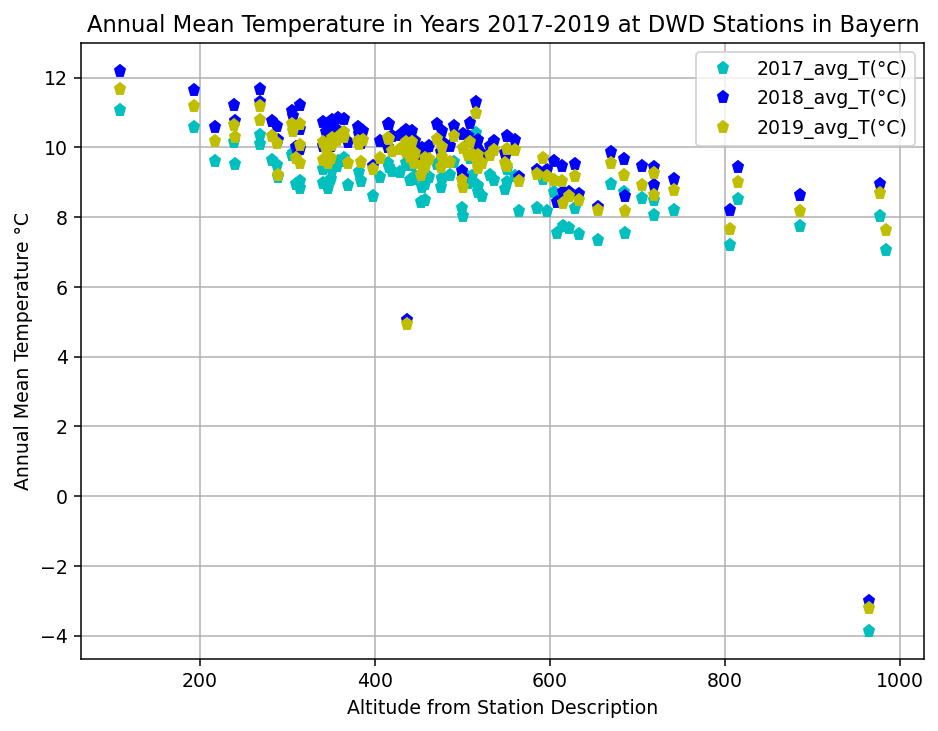

In [24]:
fig2, ax2 = plt.subplots(dpi=136, figsize=(8,6))
#idx = list(df2.index)
#df2[idx].plot(ax=ax1)
ax2.plot(df_6['altitude'],df_6["2017_avg_T(°C)"], 'cp', label = '2017_avg_T(°C)')
ax2.plot(df_6['altitude'],df_6["2018_avg_T(°C)"], 'bp', label = '2018_avg_T(°C)')
ax2.plot(df_6['altitude'],df_6["2019_avg_T(°C)"], 'yp', label = '2019_avg_T(°C)')
#ax1.set_xlim(pd.Timestamp('2019-05-01'), pd.Timestamp('2019-05-30'))
#ax2.set_ylim(4,14)
ax2.set_ylabel("Annual Mean Temperature °C")
ax2.set_xlabel("Altitude from Station Description")
ax2.set_title("Annual Mean Temperature in Years 2017-2019 at DWD Stations in Bayern")
ax2.grid(True)
ax2.legend()
#fig2.savefig("bayern_station_altitude_vs_annual_mean_temperature_2k17-19plot.png")
plt.show()

#### The greater the altitude the lower the temperature!

## Task 1.3 Plot the annual mean temperatures of years 2017, 2018, and 2019 versus altitude of the stations based off of the DTM, in Bavaria.

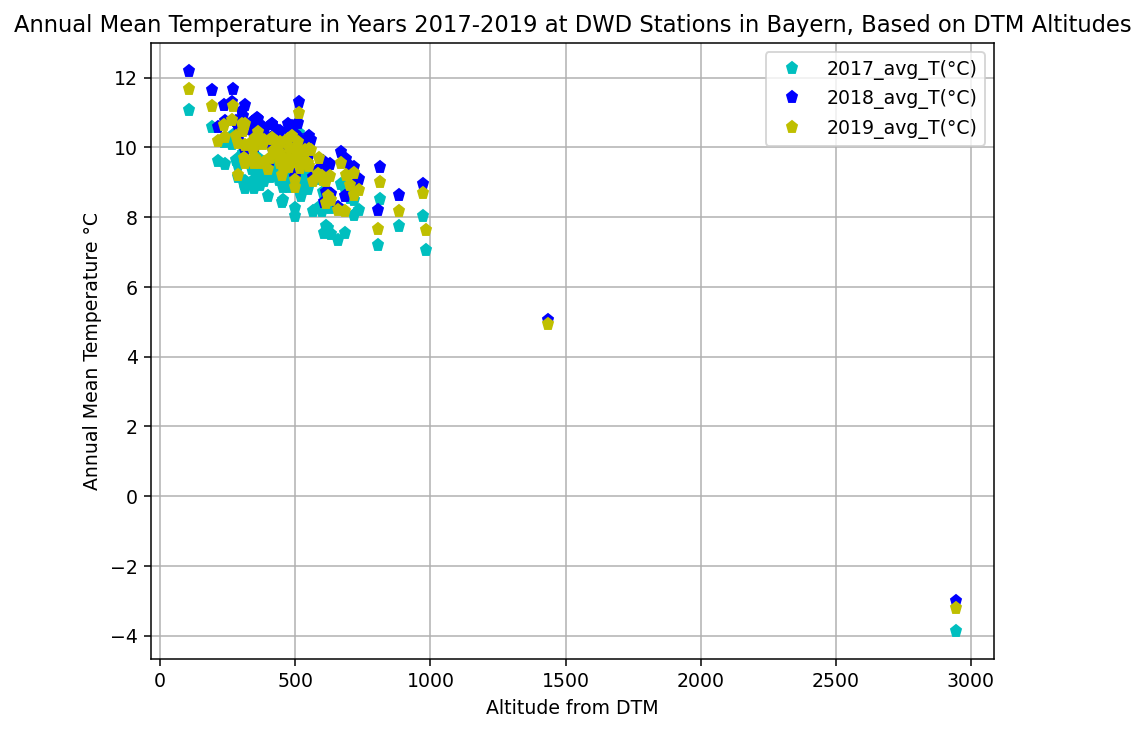

In [25]:
fig3, ax3 = plt.subplots(dpi=136, figsize=(8,6))
#idx = list(df_6.index)
#df_6[idx].plot(ax=ax1)
ax3.plot(df_6['DTM50_Altitude'],df_6["2017_avg_T(°C)"], 'cp', label = '2017_avg_T(°C)')
ax3.plot(df_6['DTM50_Altitude'],df_6["2018_avg_T(°C)"], 'bp', label = '2018_avg_T(°C)')
ax3.plot(df_6['DTM50_Altitude'],df_6["2019_avg_T(°C)"], 'yp', label = '2019_avg_T(°C)')
#ax1.set_xlim(pd.Timestamp('2019-05-01'), pd.Timestamp('2019-05-30'))
#ax2.set_ylim(4,14)
ax3.set_ylabel("Annual Mean Temperature °C")
ax3.set_xlabel("Altitude from DTM")
ax3.set_title("Annual Mean Temperature in Years 2017-2019 at DWD Stations in Bayern, Based on DTM Altitudes")
ax3.grid(True)
ax3.legend()
fig3.savefig("bayern_DTM_altitude_vs_annual_mean_temperature_2k17-19plot.png")
plt.show()

### The values for altitude are different in the sampled DTM and station File. 
### Let us take a look at the dataframe and perform a linear regression to see outliers!

In [27]:
df_6 [df_6.DTM50_Altitude >=1000] #Zugspitze outlier easy to see from graph, what about the others...

,,2017_avg_T(°C),2018_avg_T(°C),2019_avg_T(°C),DTM50_Altitude,altitude,latitude,longitude
stations_id,name,,,,,,,
1832,Großer Arber,NaN,5.05,4.94,1433.200073,436,49.1129,13.1338
5792,Zugspitze,-3.86,-3.00,-3.20,2943.400146,965,47.4210,10.9848


## Plot Linear Regression; DTM altitude VS station altitude.
## Follow development in notebook `Linear Regressions` !!